PARCIAL SEGUNDO CORTE METODOS NUMERICOS

1.Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de
luz en nuestros telescopios. La luz de las estrellas puede tratarse efectivamente como si viniera de un punto
fuente en el infinito. Cuando dicha luz, con longitud de onda λ, pasa a través de la circular
apertura de un telescopio (que asumiremos que tiene un radio unitario) y está enfocado por el
telescopio en el plano focal, produce no solo un punto, sino un patrón de difracción circular
que consiste en una mancha central rodeada por una serie de anillos concéntricos. La intensidad de
la luz en este patrón de difracción viene dada por

a) Escriba una función de Python J (m, x) que calcule el valor de Jm (x) usando Simpson
regla con N = 1000 puntos. Use su función en un programa para hacer una trama, en un
gráfico único, de las funciones de Bessel J0, J1 y J2 en función de x de x = 0 a
x = 20.

In [0]:
from numpy import loadtxt, sum, array, linspace, exp, arange, pi, cos, sin, sqrt, empty
from math import factorial, tanh, cosh
from pylab import plot, show, xlabel, ylabel, imshow, hot, xlim, ylim, gray         ## librerias y parametros para que el programa puede tener una buena ejecucion y sintasis 


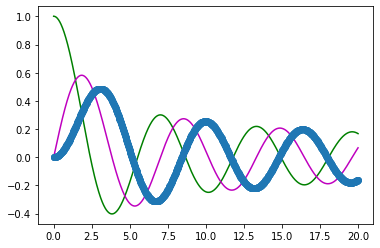

In [2]:
 def J(m, x): #  definimos la funcion.
     def f(m, x, theta):
         return cos(m*theta - x* sin(theta))

     N = 1000  # tamaño o numero de partes en que queremos dividir 
     a = 0  # parametro o limite inferior
     b = pi  #parametro o limite superior 
     h = (b - a) / N  # separacion entre dos puntos consecutivos 

     imparSum = 0 #acomulador 
     for k in range(1, N, 2): #condicional que haga iteraciones secuencialmente de acuerdo a los parametros establecidos 
         imparSum += f(m, x, a + k*h) # para los numeros pares

     parSum = 0 
     for k in range(1, N, 2):
         parSum += f(m, x, a + k*h) #para los numeros impares 

     return 1 / pi * 1 / 3 * h * (f(m, x, a) + f(m, x, b) + 4 * imparSum + 2 * parSum) #me retorna el resultado de la integral de acuerdo al metodo de simpson 


 xpoints = linspace(0, 20, 1000) #parametros y numero de muestras para cada funcion de Bessel
 J0 = []
 J1 = []
 J2 = []
 for x in xpoints:
     J0.append(J(0, x))
     J1.append(J(1, x))
     J2.append(J(2, x))

 plot(xpoints, J0, "g") #g,m y o, representa el color y forma de las funciones al representarlas graficamente 
 plot(xpoints, J1, "m")
 plot(xpoints, J2, "o")
 show()

observamos que el resultado para cada una de las funciones de Bessel, tenemos que para J0 esta representada por el color verde, notamos que no parte de cero si no de uno y a lo largo de su trayectoria se va volviendo periodica teniendo el mismo comportamiento qeu las otras dos funciones, para J1 y J2 observamos que parten de cero, pero tienen un cierto desface notamos que es el mismo desface para cada una de las funciones donde a simple vista se observa que la grafica de cada una de las funciones tienen a ser la misma despues de cierto tiempo. 


b) Haga un segundo programa que haga un diagrama de densidad de la intensidad de la circular.
patrón de difracción de una fuente de luz puntual con λ = 500 nm, en una región cuadrada de
el plano focal, usando la fórmula dada arriba. Tu imagen debe cubrir valores
de r desde cero hasta aproximadamente 1 µm.

In [0]:
from numpy import loadtxt, sum, array, linspace, exp, arange, pi, cos, sin, sqrt, empty
from pylab import plot, show, xlabel, ylabel, imshow, hot

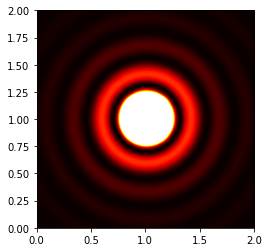

In [6]:
 def r(x, y):
     return sqrt(x**2 + y**2)

 def I(r):
     if (r == 0):
         return 1/2

     Lambda = 0.5 # dado en micrometros
     kr = 2 * pi / Lambda * r
     return (J(1,kr)/ kr)**2

 side = 2 # longitud tambien dado en micrometros
 points = 200 # número de puntos de cuadrícula en cada dirección
 spacing = side/points


# Calcular la posición del centro
 xCenter = side/2
 yCenter = side/2

# Hacer una matriz vacía para almacenar valores
 intensities = empty([points, points], float)


# Calcular los valores en la matriz
 for i in range(points):
     y = spacing * i
     for j in range(points):
         x = spacing * j
         dist = r(x - xCenter, y - yCenter)
         intensities[i, j] = I(dist)

 imshow(intensities, origin="lower", extent=[0,side,0,side], vmax=0.01)
 hot()
 show()

observamos el resultado el comportaiento en los anillos, notamos que la imagen tienen a tener colores mas fuertes por decirlo asi en el origen en un radio pequeño y a medida que este radio empieza a ser mas grande los colores tienden a desvanecerse a lo que se le agrega que no hay densidad significatica cuando el radio es mayor a un micrometro.